# Filtering

## Filter out dangling ends and self-circles

In [4]:
r_enz = 'HindIII'
rep = 'T0'

The `max_molecule_length` parameter used to filter-out pseudo-dangling-ends can be extracted from the previous section in the computation of insert size.

The `min_distance_to_re`, that affects the detection of random breaks, should be a bit larger in order to contain almost all the fragments.

In [5]:
from pytadbit.mapping.filter import filter_reads

# this will last ~10 minutes
masked = filter_reads(
    'results/fragment/{0}_{1}/03_filtering/reads12_{0}_{1}.tsv'.format(r_enz, rep), 
    max_molecule_length=750, over_represented=0.005, max_frag_size=100000, min_di
    min_frag_size=100, re_proximity=5, min_dist_to_re=1000)

/home/fransua/.miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Filtered reads (and percentage of total):

     Mapped both                :     18745254 (100.00%)
  -----------------------------------------------------
   1- self-circle               :       355967 (  1.90%)
   2- dangling-end              :      1052034 (  5.61%)
   3- error                     :        22218 (  0.12%)
   4- extra dangling-end        :      2477163 ( 13.21%)
   5- too close from RES        :      2563918 ( 13.68%)
   6- too short                 :       200432 (  1.07%)
   7- too large                 :         2221 (  0.01%)
   8- over-represented          :       617695 (  3.30%)
   9- duplicated                :      1427099 (  7.61%)
  10- random breaks             :      2406210 ( 12.84%)


This generates a dictionary with the different filters and the reads affected by each.

### Apply filters on the data

In [12]:
from pytadbit.mapping.filter import apply_filter

apply_filter('results/fragment/{0}_{1}/03_filtering/reads12_{0}_{1}.tsv'.format(r_enz, rep), 
             'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(r_enz, rep), masked, 
             filters=[1, 2, 3, 4, 6, 7, 8, 9, 10])

    saving to file 11648343 reads without .


11648343

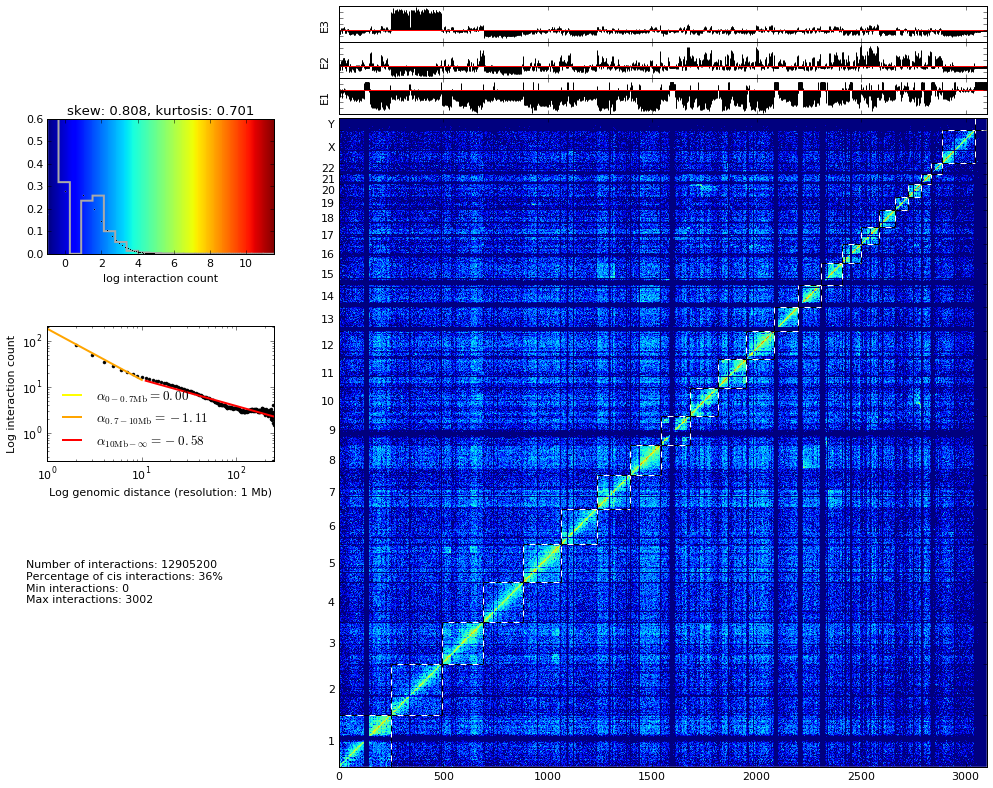

In [13]:
from pytadbit.mapping.analyze import hic_map

hic_map('results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(r_enz, rep), 
        resolution=1000000, show=True)

Zoom to a single chromosome or a region:

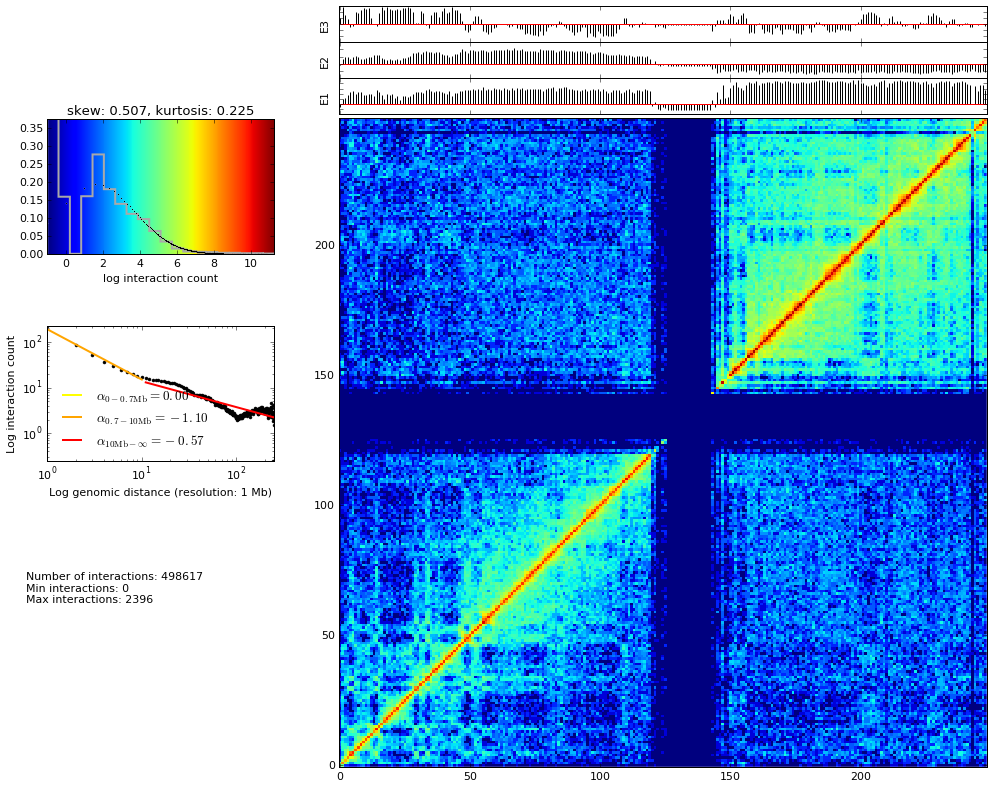

In [14]:
hic_map('results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(r_enz, rep), 
        resolution=1000000, show=True, focus='1')

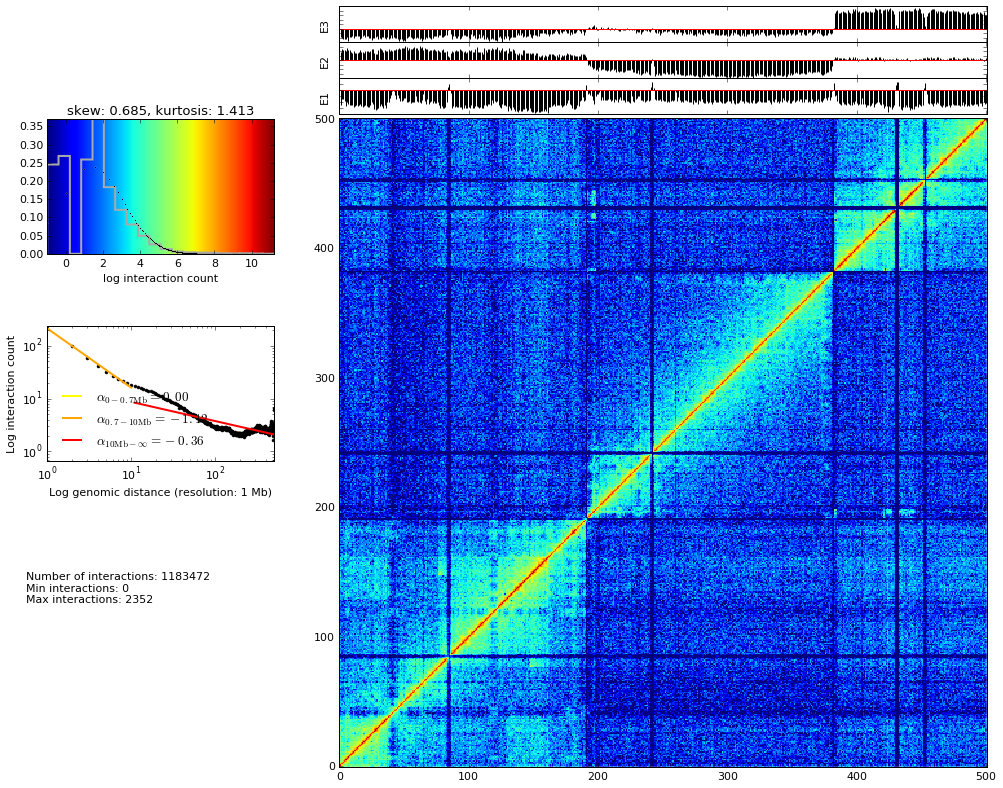

In [15]:
hic_map('results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(r_enz, rep), 
        resolution=1000000, show=True, focus=(500, 1000))